# **Lab 8: Logistic Regression**

### What is Logistic Regression?

Logistic Regression is a supervised learning algorithm used for classification tasks where the goal is **to predict** the **probability** that an instance belongs to the given class.
It is used for binary classification and to analyze the relationship between two data factors.

Logistic Regression transforms the **linear regression** function continuos value output into categorical value output using the **Sigmoid Function**.

Heres an example of the transformation:

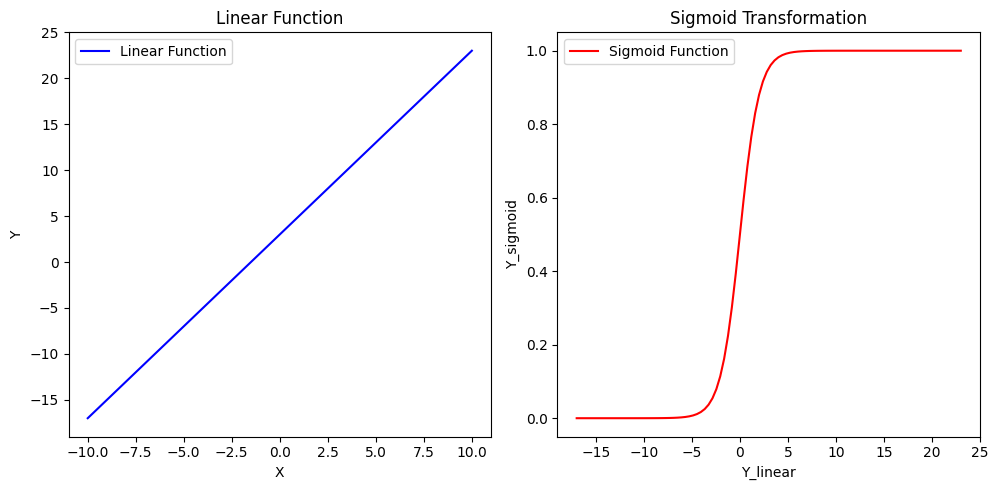

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for illustration
X = np.linspace(-10, 10, 100)
Y_linear = 2 * X + 3  # Example of a linear function
Y_sigmoid = 1 / (1 + np.exp(-Y_linear))  # Sigmoid transformation

# Plot the linear function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(X, Y_linear, label='Linear Function', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Function')
plt.legend()

# Plot the sigmoid transformation
plt.subplot(1, 2, 2)
plt.plot(Y_linear, Y_sigmoid, label='Sigmoid Function', color='red')
plt.xlabel('Y_linear')
plt.ylabel('Y_sigmoid')
plt.title('Sigmoid Transformation')
plt.legend()

plt.tight_layout()
plt.show()


The left subplot shows the linear function, while the right subplot shows the sigmoid transformation of the linear function. You'll notice that the sigmoid transformation squashes the linear function to a range between 0 and 1, mapping the real line to a sigmoid curve.

### The Sigmoid Function

**Properties**
1. Range: between 0 and 1
2. Shape of the graph: S-shape curve
3. Asymptotes: As x approaches positive infinity, output approaches 1. As x approaches negative infinity, output approaches 0.

Graph Example:

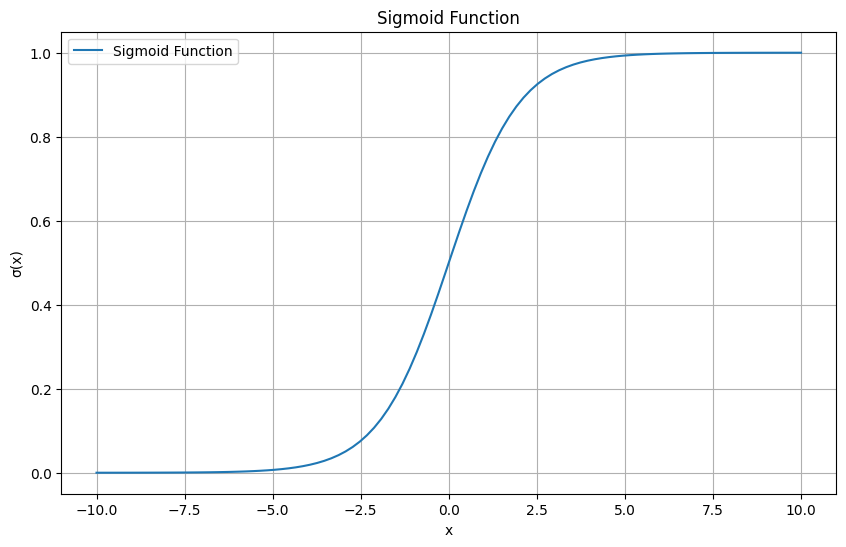

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of values from -10 to 10
x_values = np.linspace(-10, 10, 100)

# Apply the sigmoid function to each value
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()


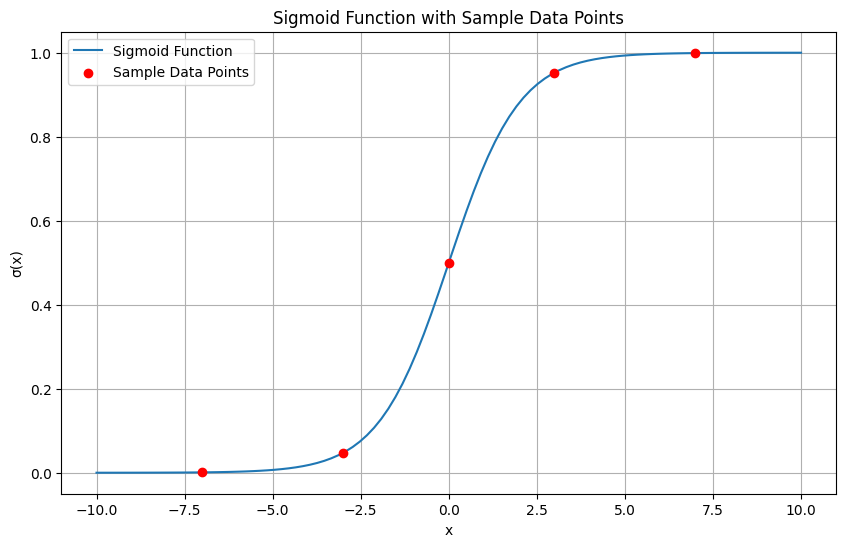

In [ ]:
# Sample data points
sample_data = np.array([-7, -3, 0, 3, 7])
sample_sigmoid = sigmoid(sample_data)

# Plot the sigmoid function with sample data points
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.scatter(sample_data, sample_sigmoid, color='red', zorder=5, label='Sample Data Points')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Sigmoid Function with Sample Data Points')
plt.grid(True)
plt.legend()
plt.show()


## Types of Logistic Regressions

#### 1. **Binomial Logistic Regression**
   has only two outcomes (dependent variable = binary)

Example:



**Problem**: Predicting whether a patient from Hospital A has a disease (Yes/No) based on age and their cholestrol level.

**Data type**: Binary Outcomes (0 & 1)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


#### 2. **Multinomial Logistic Regression**
   when the dependent variable has **more than TWO** categories that are **NOT** ordered.

**Problem**: Predicting the type of fruit (apple, grape, banana) based on its sweetness and crunchiness.

**Data type**: Categorical outcomes with more than 2 categories.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a multiclass classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### 3. **Ordinal Logistic Regression**
   when the dependent variable has more than 2 categories with a meaningful order or ranking.


**Problem**: Predicting customer satisfaction level (high, medium, low) based on response time and service quality.

**Data type**: Ordered categorical outcomes.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Generate a dataset with an ordinal dependent variable
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# Ordinal encoding for the target variable (assuming 0 < 1 < 2)
encoder = OrdinalEncoder()
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### 4. **Single-Predictor Logistic Regression**
   also known as Simple Logistic Regression. It uses one independent variable (predictor) to predict binary outcomes.

**Problem**: Predicting whether a student pass or fail based on the hours of study. (predictor should be numeric)

**Data**: Binary outcomes (0 & 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example dataset with a single independent variable
X = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


#### 5. **Multiple-Predictor Logistic Regression**
   uses multiple predictors to predict binary outcomes.

**Problem**: Predicting loan approval based on income, creditscore and age.

**Data**: Binary outcomes (0 & 1)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a dataset with multiple independent variables
X, y = make_classification(n_samples=100, n_features=5, n_informative=5, n_redundant=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6



## Regularization in Logistic Regression
Regularization techniques like L1 (Lasso) and L2 (Ridge) help prevent overfitting by adding penalties to large coefficients.
- **L1 Regularization (Lasso)**: Can shrink some coefficients to zero, leading to feature selection.
- **L2 Regularization (Ridge)**: Shrinks all coefficients without making any of them exactly zero.



## Comparison of Logistic Regression with Other Classification Models
| Model               | Pros                                  | Cons                               |
|---------------------|--------------------------------------|-----------------------------------|
| Logistic Regression | Interpretable, simple, fast         | Assumes linear decision boundary |
| Decision Tree      | Handles non-linearity, easy to interpret | Can overfit without pruning |
| SVM               | Effective in high-dimensional spaces | Computationally expensive |



## Advantages and Disadvantages of Logistic Regression
**Advantages:**
- Simple and easy to implement
- Works well for linearly separable data
- Outputs probabilities, useful for decision-making

**Disadvantages:**
- Assumes linear relationships between features and log-odds
- Not suitable for highly complex datasets with intricate decision boundaries


## Logistic Regression using Real-world dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names)

### Data Preprocessing

In [ ]:
df.replace('?', np.nan, inplace=True)

df.dropna(inplace=True)

for col in ['ca', 'thal']:
    df[col] = pd.to_numeric(df[col])

X = df.drop('target', axis=1)
y = df['target']

# Binarize the target variable: 0 for no disease, 1 for disease
y = (y > 0).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

Accuracy: 0.8667
Confusion Matrix:
 [[32  4]
 [ 4 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



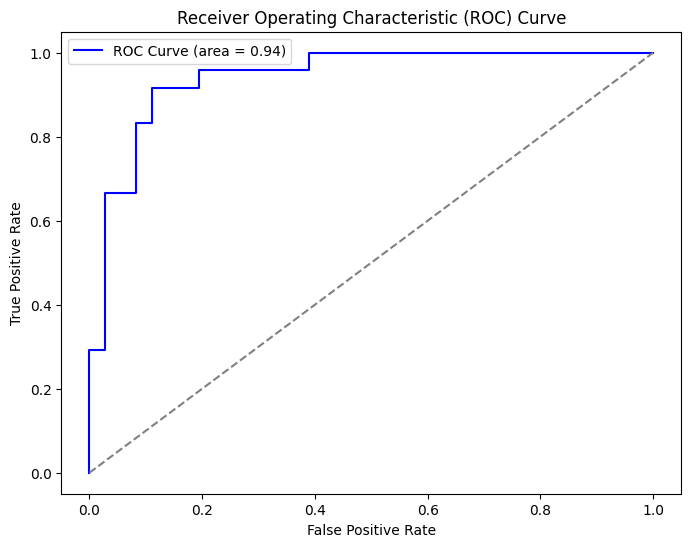

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Conclusion

Logistic Regression is a fundamental approach in machine learning for building, training, and evaluating predictive models. It can be adapted and expanded upon for different datasets and classification problems by selecting appropriate features, tuning model hyperparameters, and employing more sophisticated feature engineering and model validation techniques.